In [1]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *

v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [2]:
GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'
RL_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/RL_straight_line'
PID_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/PID_line'

save_plot_path = 'eval/results_any/F1_straight_line_ga_rl'
num_data = 5

GA_data_df = []
RL_data_df =[]
Pid_data_df=[]
for i in range(num_data):
     
    ga_data_df = pd.read_csv(os.path.join(GA_data_path, 'log_data{}.csv'.format(i)))
    rl_data_df = pd.read_csv(os.path.join(RL_data_path, 'log_data_rl_{}.csv'.format(i)))
    pid_data_df = pd.read_csv(os.path.join(PID_data_path, 'log_data_pid_{}.csv'.format(i)))
    
    GA_data_df.append(ga_data_df)
    RL_data_df.append(rl_data_df)
    Pid_data_df.append(pid_data_df)
 
IO(save_plot_path+'/ga_data_df.pkl').to_pickle(GA_data_df)
IO(save_plot_path+'/rl_data_df.pkl').to_pickle(RL_data_df)
IO(save_plot_path+'/pid_data_df.pkl').to_pickle(Pid_data_df)
max_step = 2000
dt = 0.01

 
 

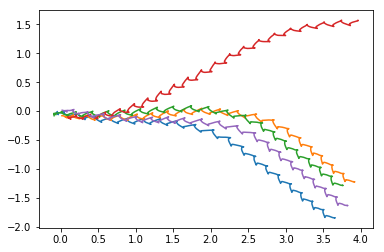

In [3]:
plt.figure()
 
t = np.arange(0, max_step * dt, dt)

for i in range(num_data):
    xyz = GA_data_df[i].loc[:, '10':'12'].values
    plt.plot(xyz[:max_step, 0], xyz[:max_step, 1]  )
 

In [4]:
GA_data_df = IO(save_plot_path+'/ga_data_df.pkl').read_pickle()
RL_data_df =IO(save_plot_path+'/rl_data_df.pkl').read_pickle()
PID_data_df =IO(save_plot_path+'/pid_data_df.pkl').read_pickle()

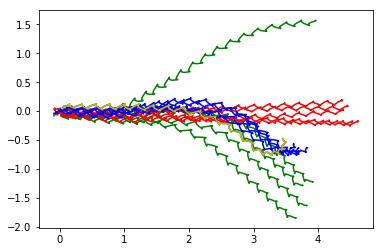

In [5]:
  
t = np.arange(0, max_step * dt, dt)



for i in range(num_data):
    xyz = GA_data_df[i].loc[:, '10':'12'].values
    plt.plot(xyz[:max_step, 0], xyz[:max_step, 1] , color = 'g')
    
for i in range(num_data):
    xyz = RL_data_df[i].loc[:, '10':'12'].values
    plt.plot(xyz[:max_step, 0], xyz[:max_step, 1] , color = 'r')    

for i in range(num_data):
    xyz = PID_data_df[i].loc[:, '10':'12'].values
    plt.plot(xyz[:max_step, 0], xyz[:max_step, 1] , color = 'b')   
i = 3
xyz = PID_data_df[i].loc[:, '10':'12'].values
plt.plot(xyz[:max_step, 0], xyz[:max_step, 1] , color = 'y')
# GA min 0  max 3  -1

# RL min 1 max 4  -1

# PID min 3 max 4 -1



In [30]:

def find_maxminResults(df, )
    xyz = GA_data_df[0].loc[:, '10':'12'].values[:max_step]
    y_min=xyz[:, 1].copy()
    y_max=xyz[:, 1].copy()
    for i in range(1, num_data):
        xyz = GA_data_df[i].loc[:, '10':'12'].values[:max_step]
        print(i)
        for j in range(max_step):
            if xyz[j,1] > y_max[j]:
                y_max[j] = xyz[j,1]

            if xyz[j,1]<y_min[j ]:
                y_min[j ] = xyz[j,1]
    return y_mean, y_min, y_max
 
xyz = GA_data_df[0].loc[:, '10':'12'].values[:max_step]
plt.plot(xyz[:, 0], y_min  , color = 'y')        
plt.plot(xyz[:, 0], y_max  , color = 'r')   



SyntaxError: invalid syntax (<ipython-input-30-0a16b18bcc93>, line 2)

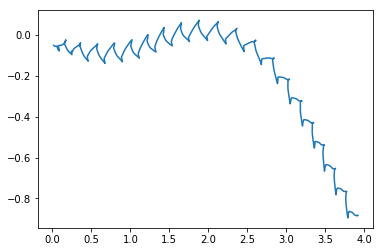

In [92]:
y_list = []
x_list =[]
for i in range(num_data):
    xyz = GA_data_df[i].loc[:, '10':'12'].values[:max_step]
    x = xyz[:,0]
    y = xyz[:,1]
    x_list.append(x)
    y_list.append(y)
y_list = np.array(y_list)
x_list = np.array(x_list)

ga_y = y_list.mean(axis=0)
ga_x = GA_data_df[1].loc[:, '10':'12'].values[:max_step, 0]

IO(save_plot_path+'/ga_data.pkl').to_pickle((ga_x, ga_y))
 
plt.plot(ga_x, ga_y)

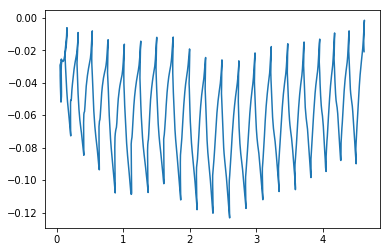

In [94]:
y_list = []
x_list =[]
for i in range(num_data):
    xyz = RL_data_df[i].loc[:, '10':'12'].values[:max_step]
    x = xyz[:,0]
    y = xyz[:,1]
    x_list.append(x)
    y_list.append(y)
y_list = np.array(y_list)
x_list = np.array(x_list)

rl_y = y_list.mean(axis=0)
rl_x = RL_data_df[1].loc[:, '10':'12'].values[:max_step, 0]

IO(save_plot_path+'/rl_data.pkl').to_pickle((rl_x, rl_y))
 
plt.plot(rl_x, rl_y)

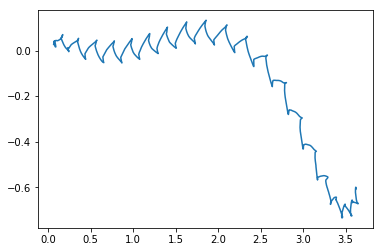

In [31]:
y_list = []
x_list =[]
for i in range(num_data):
    xyz = PID_data_df[i].loc[:, '10':'12'].values[:max_step]
    x = xyz[:,0]
    y = xyz[:,1]
    x_list.append(x)
    y_list.append(y)
y_list = np.array(y_list)
x_list = np.array(x_list)

rl_y = y_list.mean(axis=0)
rl_x = PID_data_df[1].loc[:, '10':'12'].values[:max_step, 0]

IO(save_plot_path+'/pid_data.pkl').to_pickle((rl_x, rl_y))
 
plt.plot(rl_x, rl_y)

## Summary

### GA min 0  max 3  -1

### RL min 1 max 4  -1

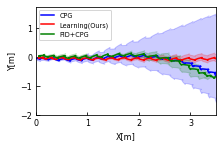

In [15]:
(rl_x, rl_y) = IO(save_plot_path+'/rl_data.pkl').read_pickle() 
(ga_x, ga_y) = IO(save_plot_path+'/ga_data.pkl').read_pickle() 
(pid_x, pid_y) = IO(save_plot_path+'/pid_data.pkl').read_pickle() 


plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
figsize = 8.2/2.54 ,8.2/2.54
fig, ax = plt.subplots(figsize = figsize)
ax.plot(ga_x, ga_y  , color = 'b', label='CPG')        
ax.plot(rl_x, rl_y  , color = 'r', label='Learning(Ours)')  
ax.plot(pid_x, pid_y  , color = 'g', label='PID+CPG')  

ga_min =   GA_data_df[0].loc[:, '10':'12'].values[:max_step, 1]
ga_max =   GA_data_df[3].loc[:, '10':'12'].values[:max_step, 1]
ax.fill_between(ga_x, ga_min, ga_max, color = 'b' ,alpha = 0.2,)


rl_min =   RL_data_df[1].loc[:, '10':'12'].values[:max_step, 1]
rl_max =   RL_data_df[4].loc[:, '10':'12'].values[:max_step, 1]
ax.fill_between(rl_x, rl_min, rl_max, color = 'r' ,alpha = 0.2,)


pid_min =   PID_data_df[3].loc[:, '10':'12'].values[:max_step, 1]
pid_max =   PID_data_df[4].loc[:, '10':'12'].values[:max_step, 1]
ax.fill_between(pid_x, pid_min, pid_max, color = 'g' ,alpha = 0.2,)

ax.set_xlim([0, 3.5])


# 字体设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 8,
}
 
# lavel 设置
plt.xlabel('X[m]', font1)
plt.ylabel('Y[m]', font1)

# legend 设置
# plt.legend(loc='upper left', numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=6)
 
# 坐标轴设置
plt.xticks(np.arange(0 ,4, 1)) 
plt.yticks(np.arange(-2 ,1.5, 1)) 
plt.tick_params(labelsize=8)
#plt.grid()
plt.legend(loc='upper left', prop={'size': 6.5})

#plt.tight_layout()
fig.set_size_inches(8.5/2.54 ,8.5/2.54/(1.618))
fig.subplots_adjust(left=0.15, bottom =0.15)
plt.savefig(save_plot_path+'/compare_traj_GA_RL.pdf', dpi=600,  pad_inches=0 )
plt.show()

In [ ]:
if save_plot_path is not None:
    plt.savefig(save_plot_path + '-xy.jpg')
else:
    plt.show()